## Import Libraries and Read the data

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing   import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.svm             import SVR
from sklearn.tree            import DecisionTreeRegressor
from sklearn.ensemble        import RandomForestRegressor
from sklearn.metrics         import r2_score,  mean_absolute_error
from xgboost                 import XGBRegressor, plot_importance

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Connect to Dataset from Google Drive 
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Read Data
df = pd.read_csv("/content/gdrive/MyDrive/SHAI/DS Internship/PUBG Project/Data/train_V2.csv")

df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


## **EDA** 

In [ ]:
df.shape

(4446966, 29)

*We have about 4.5M observation and 29 features in this data*

### Numerical & Categorical Features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

*Almost all the features are numerical columns, except 4:*
*   `matchType`: *We have to handle it*
*   `Id, groupId,matchId`: *all of them are orphan columns (Identification columns), which will not make any problem to us because before the Machine Learning Training phase we will <b>DROP THEM</b>.*

In [ ]:
print(df['matchType'].nunique())
df['matchType'].unique()

16


array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

*For the `matchType` columns we have 16 unique values*

In [ ]:
# Split the data to numerical & categorical dataframe
num_df = df.select_dtypes('number')
cat_df = df.select_dtypes('object')

### Data Cleaning

#### Missing Values

In [ ]:
df.isnull().sum().sort_values(ascending=False)

winPlacePerc       1
matchType          0
winPoints          0
weaponsAcquired    0
walkDistance       0
vehicleDestroys    0
teamKills          0
swimDistance       0
roadKills          0
rideDistance       0
revives            0
rankPoints         0
numGroups          0
maxPlace           0
Id                 0
groupId            0
longestKill        0
killStreaks        0
kills              0
killPoints         0
killPlace          0
heals              0
headshotKills      0
DBNOs              0
damageDealt        0
boosts             0
assists            0
matchId            0
matchDuration      0
dtype: int64

*We have just 1 missing value in the `winPlacePerc` featuer, we will drop it*

In [ ]:
print("The Shape Before:",df.shape)
df.dropna(inplace=True)
print("The Shape After:",df.shape)

The Shape Before: (4446966, 29)
The Shape After: (4446965, 29)


#### Distribution of the data

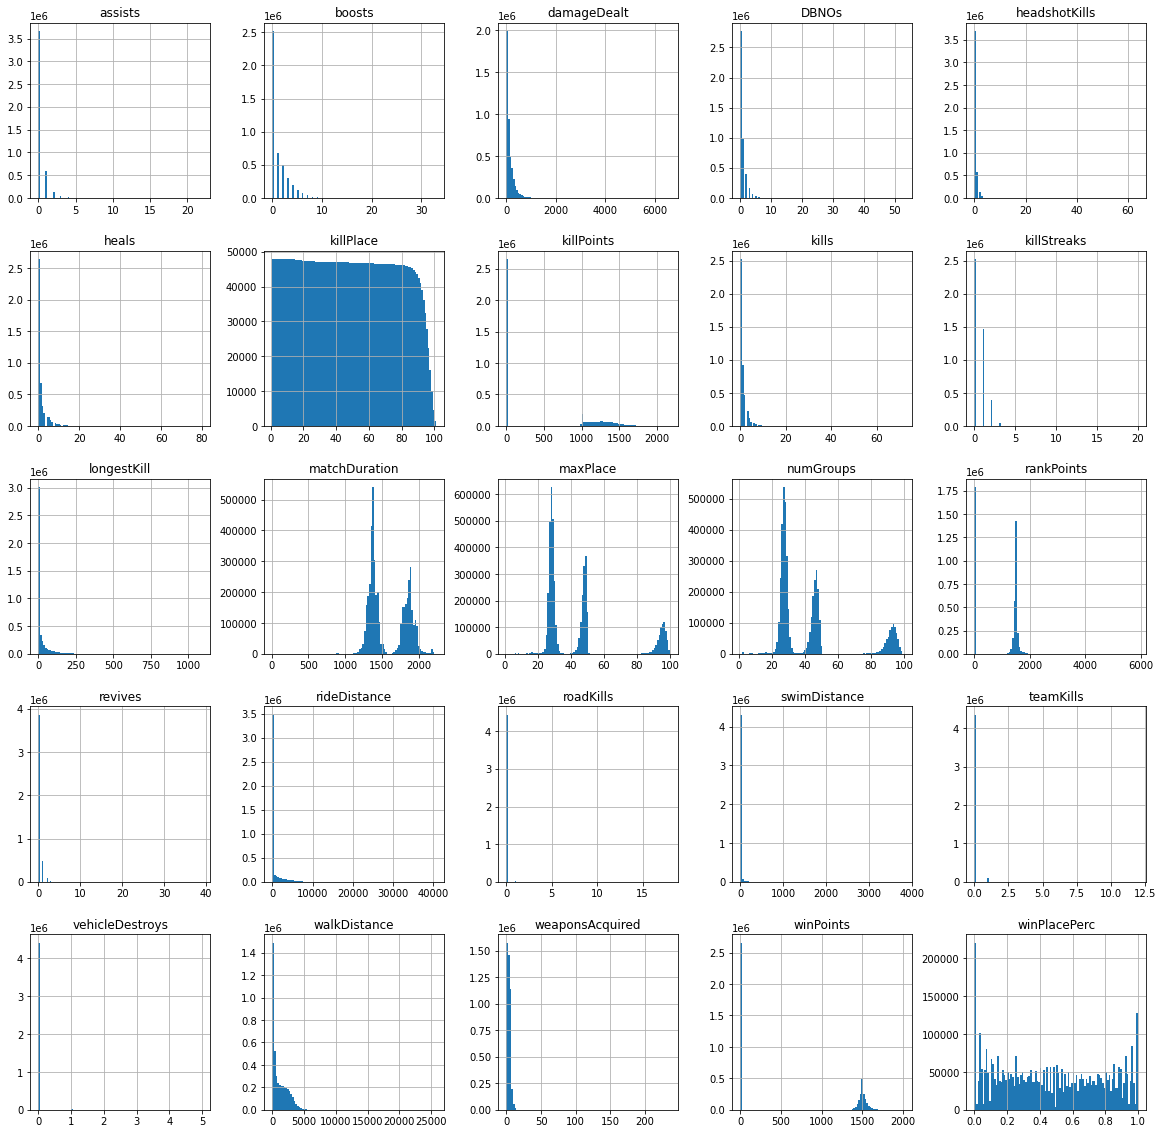

In [ ]:
num_df.hist(bins = 100, figsize=(20,20));

*The data pretty much messy.
We need to do a lot of work.*

#### Find Correlation between features

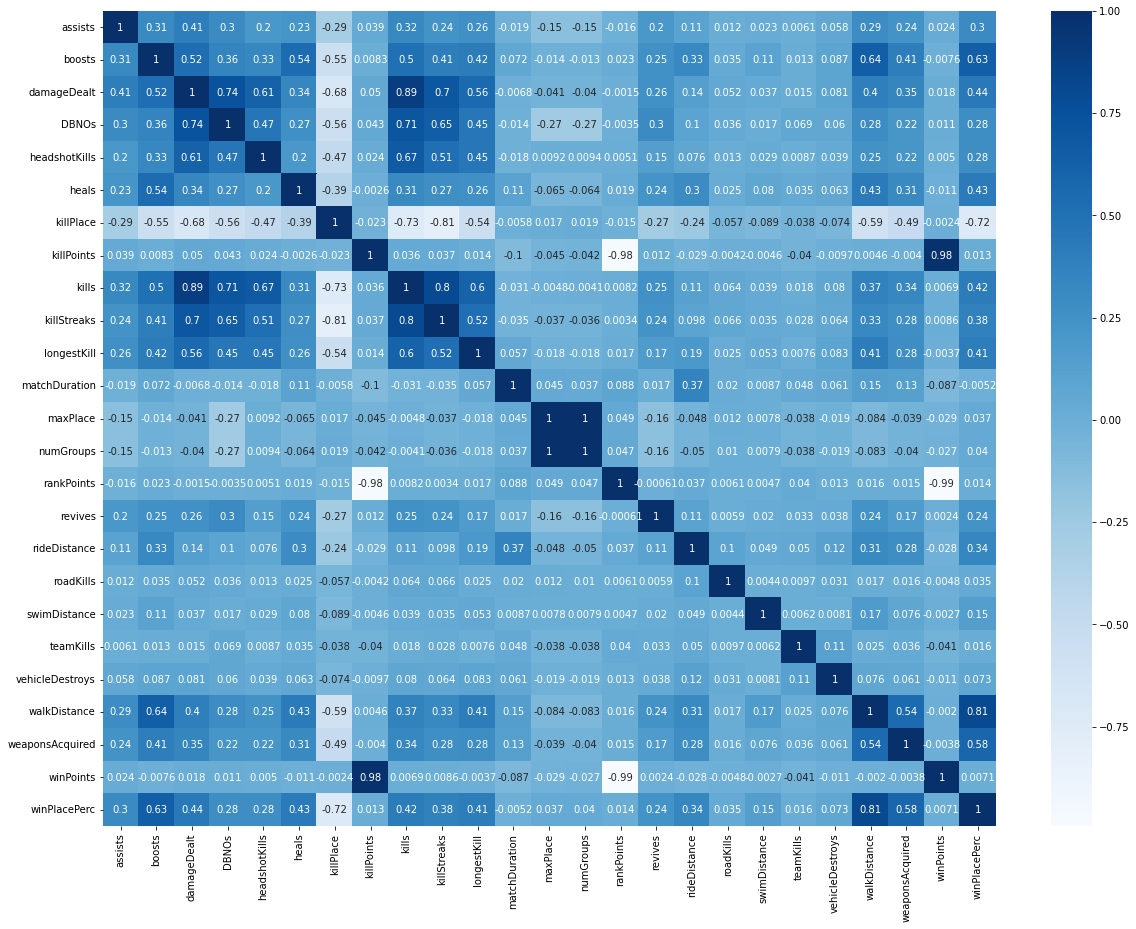

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr, cmap="Blues", ax=ax, annot=True);

In [ ]:
target_corr = corr['winPlacePerc'].sort_values(key=abs, ascending=False)[:8] # Correlation with the target feature
high_target_corr_cols = target_corr.index.to_list() # take the features names
high_target_corr_cols


['winPlacePerc',
 'walkDistance',
 'killPlace',
 'boosts',
 'weaponsAcquired',
 'damageDealt',
 'heals',
 'kills']

### Questions:

#### Who are hackers:
1. won without moving
2. Killed more than 20 without moving
3. killed more than 5 with 0 weapon aquired
4. won and the match has less than 2 minutes
5. killed more than 50 in one game

#### Who are AFK's:
1. zero distance (zero moving) with zero damage dealt 

#### Who are Noobs:
1. play more than 20 minutes with zero kill
2. Killed his teammates more than 2 times

#### Who are real gamers:
1. road kill more than 5
2. Percentage of heashot killing is 50% or more from the total killing
3. kill streaks more more than 3 
4. kill more than 10 and under 25

#### Kill Stealer:
1. low damage dealt with high kills

#### 1.Hackers

##### 1.1 won withou moving

In [ ]:
df_copy = df.copy()
df_copy['totalDistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df_copy['matchDuration'] = df_copy['matchDuration'] / 60

In [ ]:
one_one = df_copy[( df_copy['totalDistance'] == 0) & (df_copy['winPlacePerc'] == 1)]
one_one.shape


(961, 30)

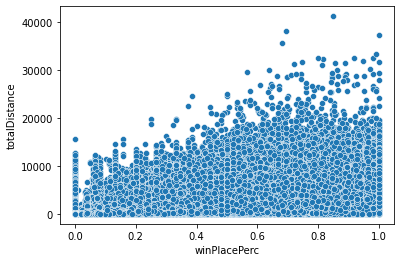

In [ ]:
fig = sns.scatterplot(data = df_copy, y= 'totalDistance', x='winPlacePerc');
#fig.show()

##### 1.2 kill more than 20 without moving

In [ ]:

one_two  = df_copy[(df_copy['kills'] >= 20) & (df_copy['totalDistance'] == 0)]
one_two.shape

(60, 30)

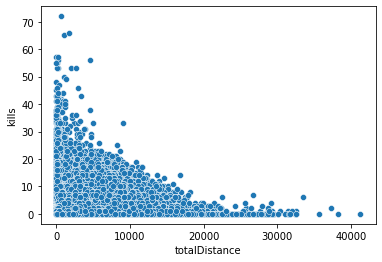

In [ ]:
sns.scatterplot(data = df_copy, x='totalDistance',y='kills');

##### 1.3 kill more than 5 with 0 weapon aquired

In [ ]:
cond3 = (df_copy['kills'] > 5 ) & (df_copy['weaponsAcquired'] == 0)
one_three = df_copy[(df_copy['kills'] > 5 ) & (df_copy['weaponsAcquired'] == 0)]
one_three.shape

(15, 30)

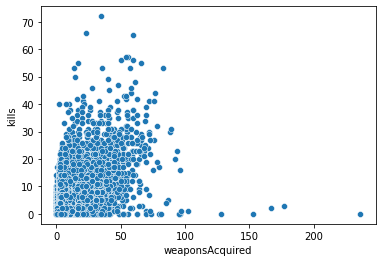

In [ ]:
sns.scatterplot(data = df_copy, x='weaponsAcquired', y ='kills');

##### 1.4 won the match with match duration less than 4 minutes

In [ ]:
one_four = df_copy[(df_copy['matchDuration'] <= 4.0) & (df_copy['winPlacePerc'] == 1)]
one_four.shape

(6, 30)

In [ ]:
one_four[['kills','matchType']]

,kills,matchType
219121,2,normal-duo-fpp
756457,2,normal-duo-fpp
1206365,1,normal-solo-fpp
1424521,5,normal-duo-fpp
1519452,0,normal-duo-fpp
2413677,0,normal-duo-fpp


##### 1.5 kill more than 40 in one match and won the game

In [ ]:
cond5 = (df_copy['kills'] >= 40)
one_five = df_copy[df_copy['kills'] >= 40]
one_five.shape

(37, 30)

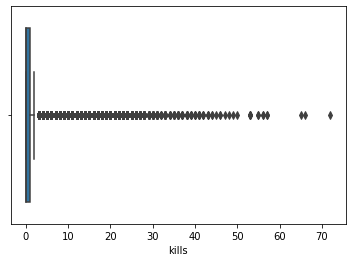

In [ ]:
sns.boxplot(x=df_copy['kills']);

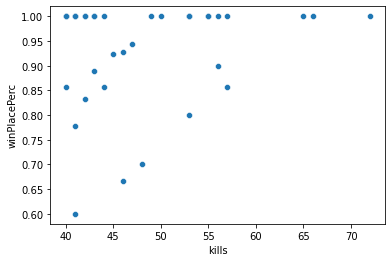

In [ ]:
sns.scatterplot(data=one_five, x = 'kills', y='winPlacePerc');

In [ ]:
one_five = one_five[one_five['winPlacePerc'] == 1]
one_five.shape

(23, 30)

#### 2.AFK's

##### 2.1 Zero distance with zero dealt damage

In [ ]:
two_one = df_copy[(df_copy['totalDistance'] == 0) & (df_copy['damageDealt'] == 0 )]
two_one.shape

(88204, 30)

#### 3.Noobs

##### 3.1 palyed more than 30 minutes with zero kill

In [ ]:
three_one = df_copy[(df_copy['matchDuration'] >= 30) & (df_copy['kills'] == 0)  ]
three_one.shape[0]

(870856, 30)

##### 3.2 kill his teammate more than two times

In [ ]:
three_two = df_copy[df_copy['teamKills'] >= 2]
three_two.shape[0]

(8159, 30)

#### 4.Real Gamer

##### 4.1 kill more than 3 on the vehicle

In [ ]:
four_one = df_copy[df_copy['roadKills'] >= 3]
four_one.shape[0]

451

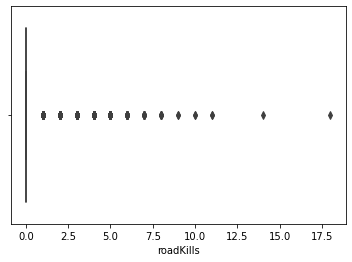

In [ ]:
sns.boxplot(data=df_copy , x=df['roadKills']);

##### 4.2 Percentage of heashot killing is 50% or more from the total killing

In [ ]:
four_two = df_copy.copy()
four_two['headShotPerc'] = four_two['headshotKills'] / four_two['kills']
four_two['headShotPerc']

0          NaN
1          NaN
2          NaN
3          NaN
4          0.0
          ... 
4446961    NaN
4446962    NaN
4446963    NaN
4446964    0.5
4446965    0.0
Name: headShotPerc, Length: 4446965, dtype: float64

In [ ]:
four_two[four_two['headShotPerc'] > 0.5].shape[0]

307592

##### 4.3 kill streak more than 3

In [ ]:
four_three = df_copy[df_copy['killStreaks'] > 3]
four_three.shape[0]

6382

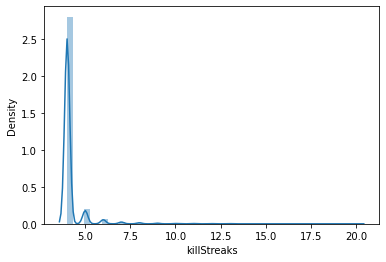

In [ ]:
sns.distplot(four_three['killStreaks']);

#### 5.Kill Stealer

##### 5.1 high number of kills with low damage dealt

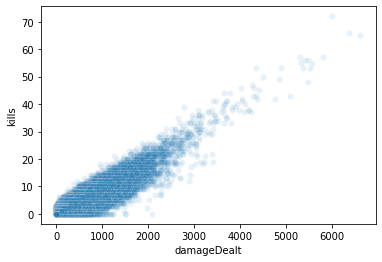

In [ ]:
sns.scatterplot(data=df_copy, x='damageDealt',y='kills', alpha = 0.1);

In [ ]:
five_one = df_copy[(df_copy['damageDealt'] <= 50) & (df_copy['kills'] >= 3)]
five_one.shape[0]

200

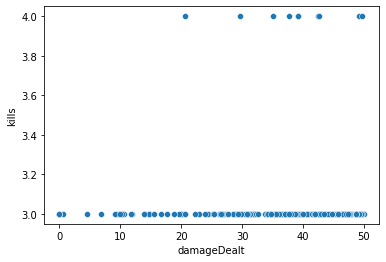

In [ ]:
sns.scatterplot(data=five_one, x='damageDealt', y='kills');

#### Percentage of winning

In [ ]:
str(round((len(df[df['winPlacePerc'] == 1]) / df.shape[0]),2)) + "%"

'0.03%'

In [ ]:
df_winners = df[df['winPlacePerc'] == 1]

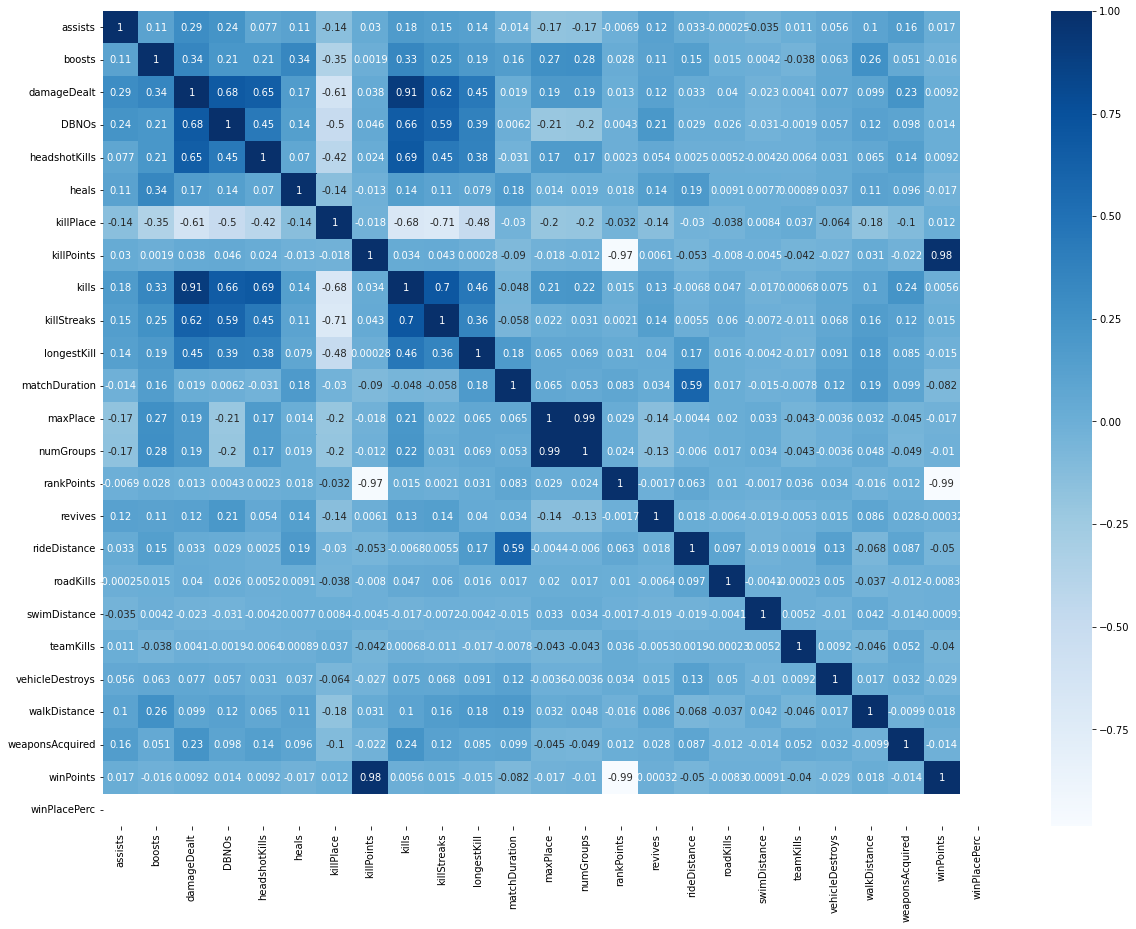

In [ ]:
winner_corr = df_winners.corr()
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(winner_corr, cmap='Blues', ax=ax,annot=True);

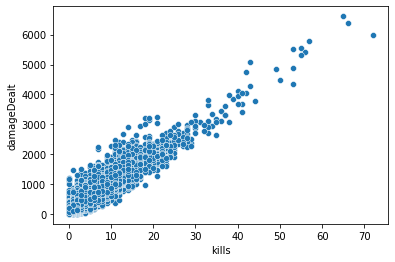

In [ ]:
sns.scatterplot(data = df_winners, x='kills',y='damageDealt');

#### Features for the making the percentage of winning higher

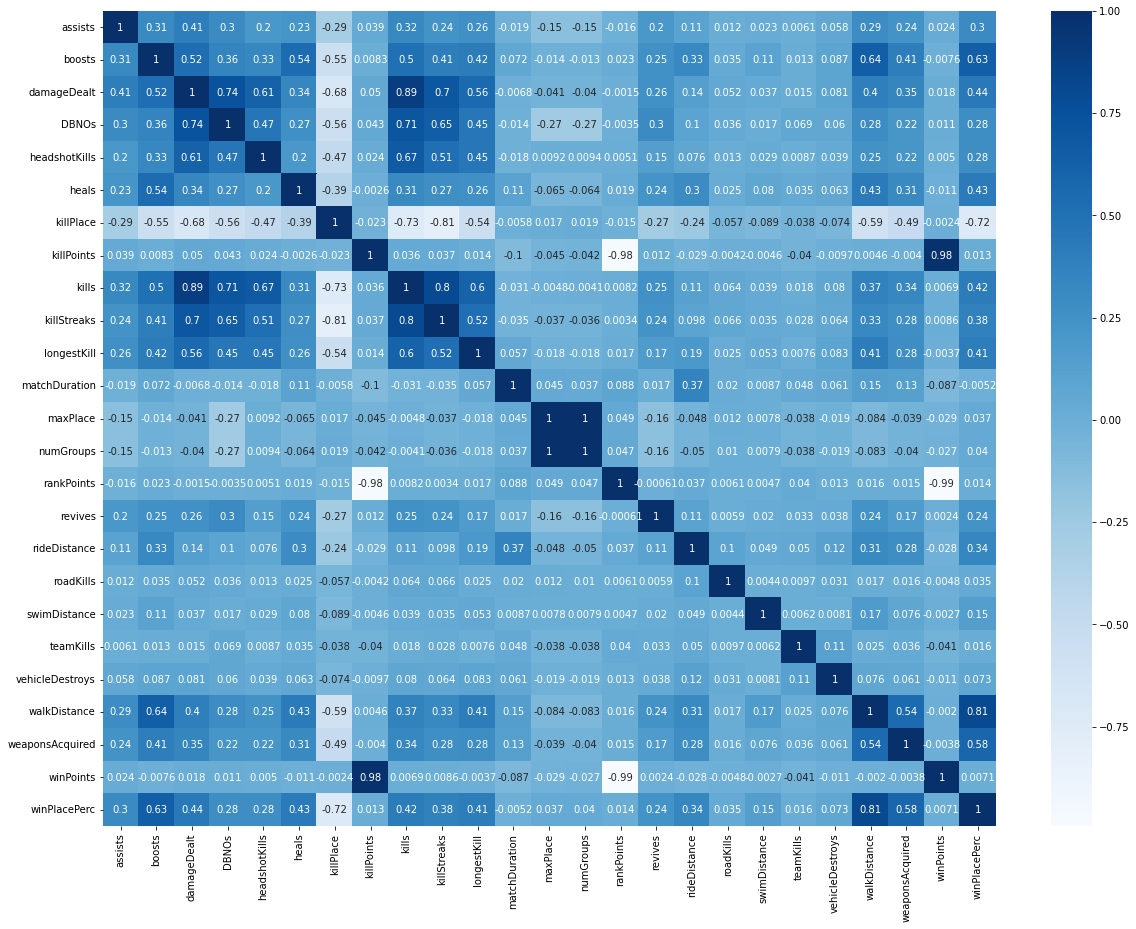

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr, cmap="Blues", ax=ax, annot=True);

*   walk more 
*   aquire more weapon
*   drink your boost

### Dive into Features (handling Outliers)

##### Dive into `boosts` feature

In [ ]:
boosts = df['boosts'].copy()
# boosts.hist();
# boosts.unique()
# boosts.value_counts()
boosts[boosts >= 8] = 8
# boosts.value_counts(normalize=True)
df['boosts'] = boosts

##### Dive into `killPlace` feature

In [ ]:
kill_place = df['killPlace'].copy()

# kill_place.unique()
# kill_place.value_counts(ascending=False).to_dict()

*Clean Column*

##### Dive into `walkDistance`

In [ ]:
walk_dist = df['walkDistance'].copy()

# walk_dist.hist()
# walk_dist.value_counts(ascending=False)
# walk_dist.nunique()
# len(walk_dist[walk_dist >= 5_000 ])
walk_dist[walk_dist >= 5_000 ] = 5_000
df['walkDistance'] = walk_dist

##### Dive into `weaponsAcquired` feature

In [ ]:
wep_aq = df['weaponsAcquired'].copy()

# wep_aq.hist();
# wep_aq.unique()
# wep_aq.value_counts(ascending=False).to_dict()
wep_aq[wep_aq >= 15] = 15
df['weaponsAcquired'] = wep_aq

##### Dive into `damageDealt`

In [ ]:
damage_dealt = df['damageDealt'].copy()

# damage_dealt.hist();
# damage_dealt.value_counts(ascending=False)
# len(damage_dealt[damage_dealt > 1_000])
damage_dealt[damage_dealt > 1_000] = 1_000
df['damageDealt'] = damage_dealt

##### Dive into `heals`

In [ ]:
heals = df['heals'].copy()

# heals.hist();
# heals.value_counts(ascending=False)[:20]
heals[heals >= 10] = 10
df['heals'] = heals

##### Dive into `kills`

In [ ]:
kills = df['kills'].copy()

# kills.hist();
# kills.value_counts(ascending=False)
kills[kills >= 15] = 15
df['kills'] = kills

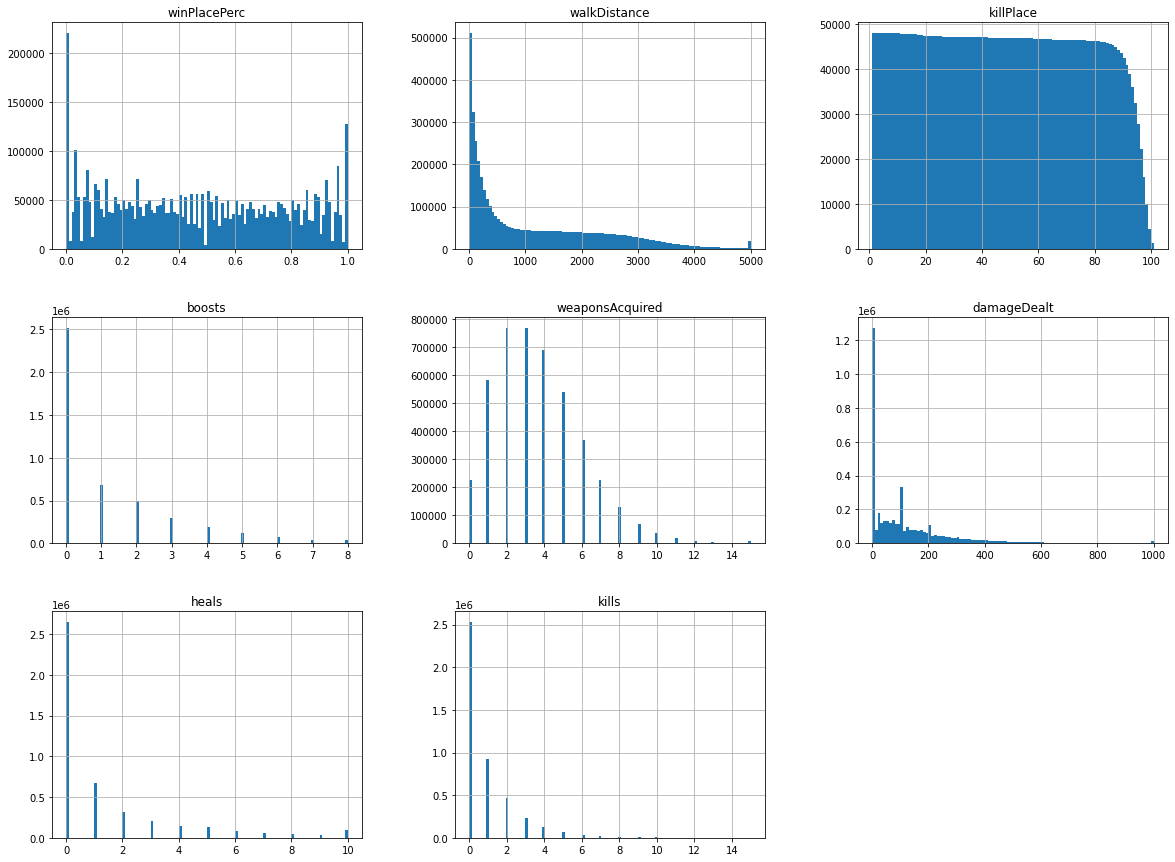

In [ ]:
# Check the distribution again after the process
df[high_target_corr_cols].hist(bins=100, figsize=(20,15));

assists


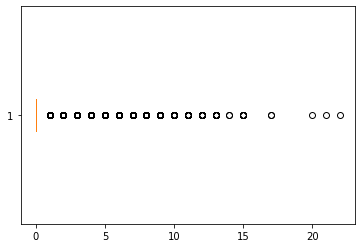

boosts


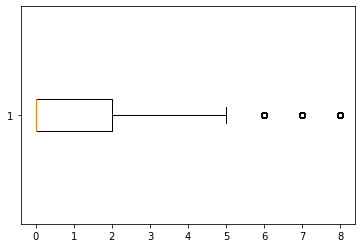

damageDealt


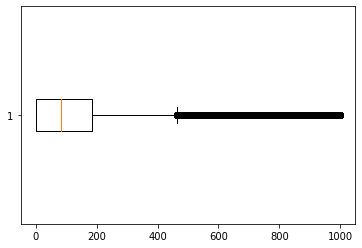

DBNOs


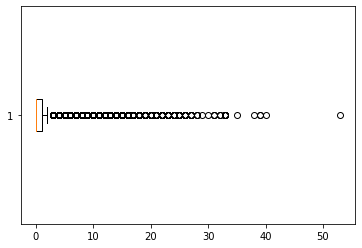

headshotKills


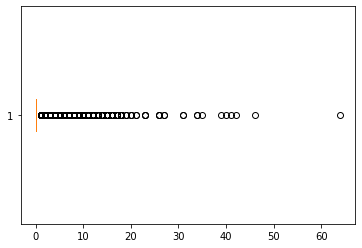

heals


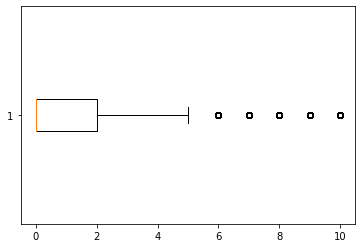

killPlace


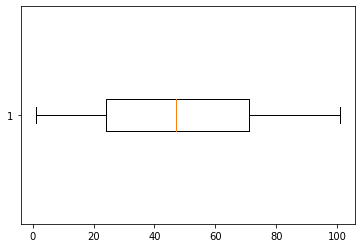

killPoints


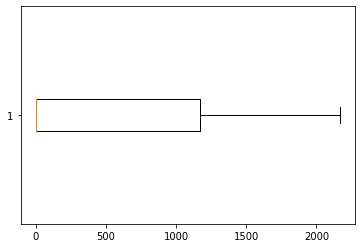

kills


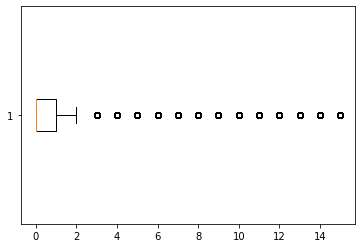

killStreaks


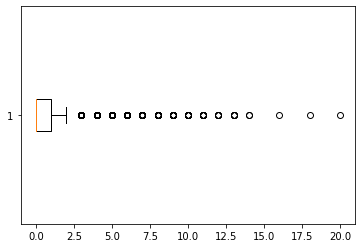

longestKill


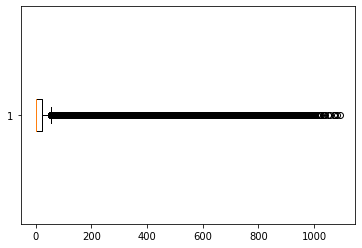

matchDuration


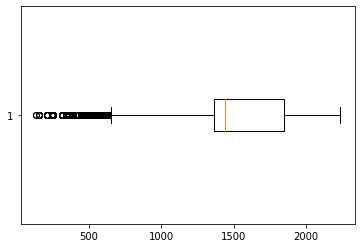

maxPlace


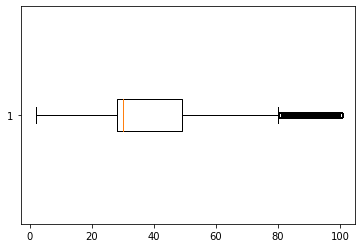

numGroups


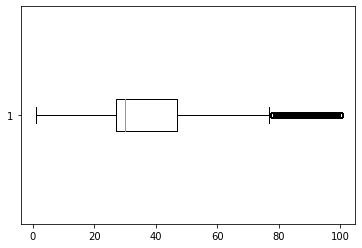

rankPoints


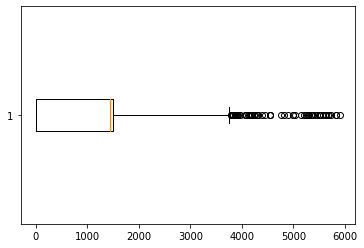

revives


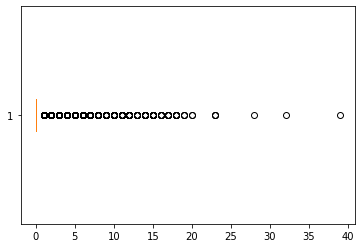

rideDistance


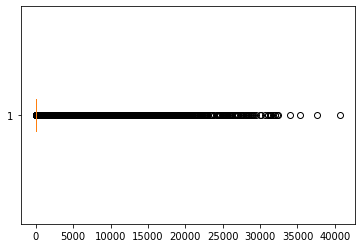

roadKills


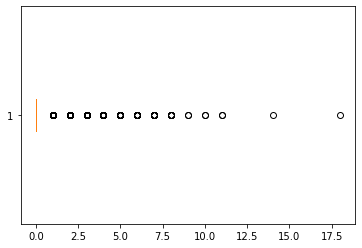

swimDistance


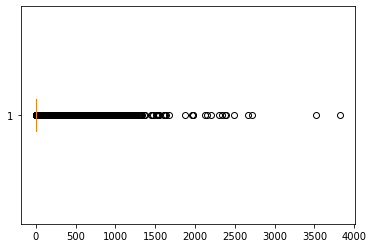

teamKills


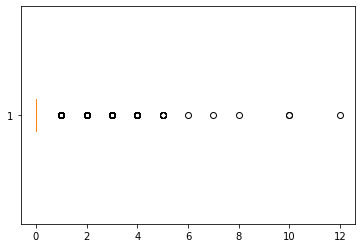

vehicleDestroys


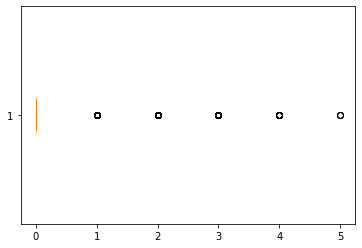

walkDistance


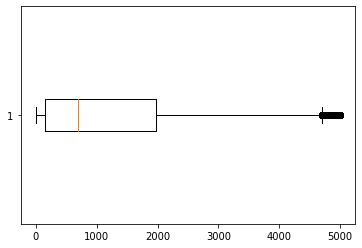

weaponsAcquired


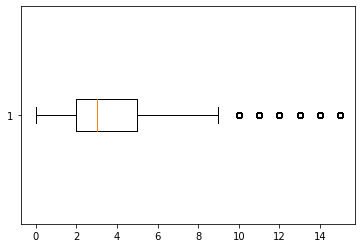

winPoints


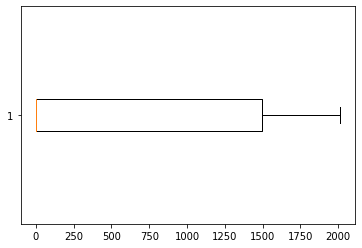

winPlacePerc


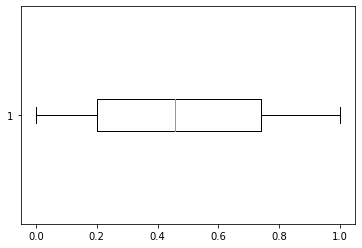

In [ ]:
for col in df.select_dtypes('number').columns:
  print(col)
  plt.boxplot( x=df[col],vert=False);
  plt.show()
#df[df.select_dtypes('number').columns].plot(kind='box', vert=False)


## Feature Engineering

### Feature Selection & Feature Preprocessing

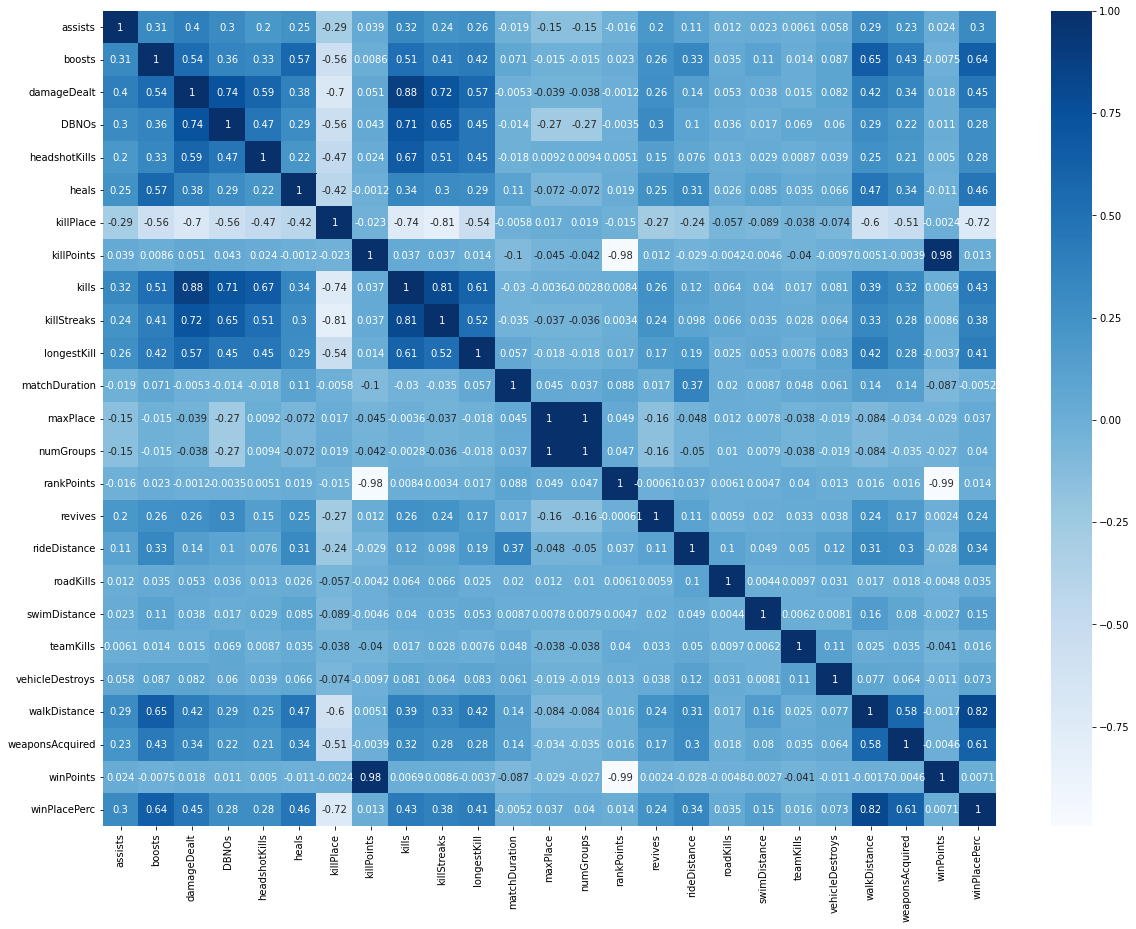

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr, cmap="Blues", ax=ax, annot=True);

*From image above we can see that*
*   `maxPlace` & `numGroups` have Identical values --> the correlation between them <b> 100%. </b>
*   `winPoints` & `killPoints`  --> the correlation between them <b> 98%. </b>
*   `winPoints` & `rankPoints`  --> the anticorrelation between them <b> 99%. </b>
*   `rankPoints` & `killPoints` --> the anticorrelation between them <b> 98%. </b>

#### Wrangle

In [ ]:
def wrangle(path):

  # Read df
  df = pd.read_csv(path)

  # Drop NA
  df.dropna(inplace=True)

  # FEATURE SELECTION:

  # Drop correlated features
#  df.drop(columns=['winPoints','killPoints','numGroups'], inplace=True)

  # Drop orphan columns
  df.drop(columns=['Id','groupId','matchId'], inplace=True)

  # Make match duration per minute
  df['matchDurationPerMinute'] = df['matchDuration'] / 60
  df.drop(columns='matchDuration', inplace=True)

  # Combining three features about distance to one total distance
  df['totalDistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
  df.drop(columns=['walkDistance','swimDistance','rideDistance'], inplace=True)
  
  # Drop Outliers (HACKERS + AFK's)
  cond1 = (df['totalDistance'] == 0) & (df['winPlacePerc'] == 1)
  cond2 = (df['kills'] >= 20) & (df['totalDistance'] == 0)
  cond3 = (df['kills'] > 5 ) & (df['weaponsAcquired'] == 0)
  cond4 = (df['matchDurationPerMinute'] <= 4.0) & (df['winPlacePerc'] == 1)
  cond5 = (df['kills'] >= 40) & (df['winPlacePerc']==1) 
  cond6 = (df['totalDistance'] == 0) & (df['damageDealt'] == 0 )
  #df = df[~cond1 & ~cond2 & ~cond3 & ~cond4 & ~cond5 & ~cond6]

  # Quantile:
  cols = ['assists','boosts','damageDealt','DBNOs','headshotKills',
          'heals','kills','killStreaks','longestKill','revives',
          'teamKills','totalDistance']

  for col in cols:
    val = df[col].quantile(0.99)
    before = df.shape[0]
    df = df[df[col] < val]
    after = df.shape[0]
    print(col,val, before - after)
    print(df.shape)
  print(df.shape)

  cols = ['headshotKills','killStreaks']
  for col in cols:
    val = df[col].quantile(0.999)
    before = df.shape[0]
    df = df[df[col] < val]
    after = df.shape[0]
    print(col,val, before - after)
    print(df.shape)
  print(df.shape)

  # FEATUERE PREPROCESSING

  # Standard Scaler
  ss = StandardScaler()
  df['longestKill'] = ss.fit_transform(df[['longestKill']])
  
  # Make Tranformation for some features to fix the skewness

  # Log for total distance
  #df['totalDistance'] = np.log(df['totalDistance'] + 14)
  
  # Log for damage dealt
  df['damageDealt'] = np.log(df['damageDealt'] + 10)
  
  #Encode categorical columns
  oe = OrdinalEncoder()
  df['matchType'] = oe.fit_transform(pd.DataFrame(df['matchType']))

  #df = df[['killPlace','maxPlace','totalDistance','matchDurationPerMinute','matchType','weaponsAcquired','damageDealt','rankPoints','boosts','heals','assists','DBNOs','revives','winPlacePerc']]

  df['heal_boosts'] = df['heals'] + df['boosts']
  df.drop(columns=['heals','boosts'], inplace=True)
  
  return df

*The purpose of this function is to perfrom the processing steps in training set and the test set in one line of code, that is for making the data easy to be transformed*

In [ ]:
df = wrangle("/content/gdrive/MyDrive/SHAI/DS Internship/PUBG Project/Data/train_V2.csv")

(4446965, 24)
assists 3.0 50279
(4396686, 24)
boosts 7.0 66308
(4330378, 24)
damageDealt 691.8 43309
(4287069, 24)
DBNOs 4.0 77140
(4209929, 24)
headshotKills 2.0 101858
(4108071, 24)
heals 11.0 54117
(4053954, 24)
kills 4.0 91100
(3962854, 24)
killStreaks 2.0 202869
(3759985, 24)
longestKill 190.5 37611
(3722374, 24)
revives 2.0 58953
(3663421, 24)
teamKills 1.0 70546
(3592875, 24)
totalDistance 8728.0 35944
(3556931, 24)
(3556931, 24)
headshotKills 1.0 325365
(3231566, 24)
killStreaks 1.0 822652
(2408914, 24)
(2408914, 24)
(2408914, 24)


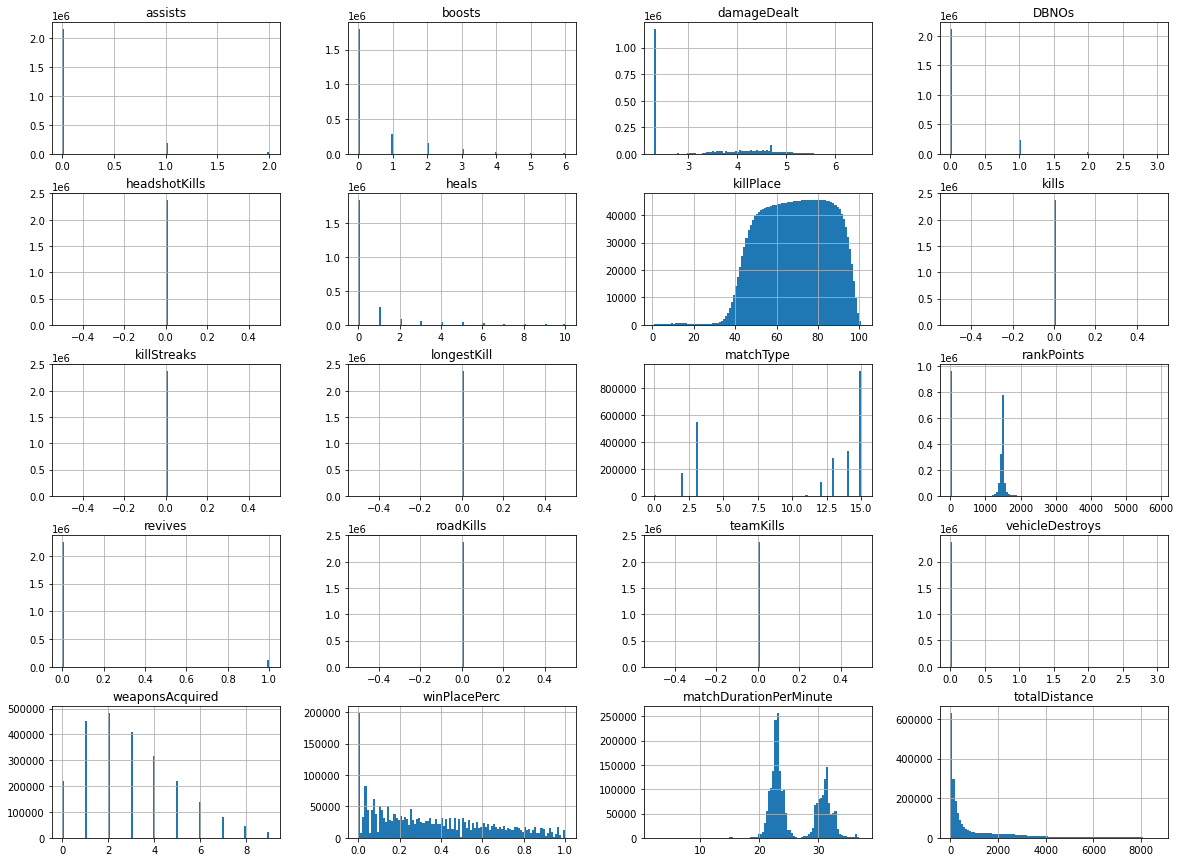

In [ ]:
df.hist(bins=100, figsize=(20,15));

## Split the Data into Training, Validation, and testing sets

In [ ]:
sample_df = df.copy() # Take half a million sample data to test the models
X = sample_df.drop(columns='winPlacePerc')
y = sample_df['winPlacePerc']

# Split the data into training & remainder 
X_train, X_rem, y_train, y_rem = train_test_split(X,y, test_size=0.05)

# Split the remainer into validation & testing 
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem , test_size=0.5)

print(X_train.shape, X_rem.shape, y_train.shape, y_rem.shape)
print(X_val.shape, X_test.shape, y_val.shape, y_test.shape)

(2288468, 22) (120446, 22) (2288468,) (120446,)
(60223, 22) (60223, 22) (60223,) (60223,)


## Accuracies Function

In [ ]:
def accuracies(model):

  # Human Level:
  mean = [y.mean()] * len(y)
  r2_human = r2_score(y,mean)
  mae_human = mean_absolute_error(y, mean)

  # Training set:
  y_pred_train = model.predict(X_train)
  r2_train = r2_score(y_train, y_pred_train)
  mae_train = mean_absolute_error(y_train, y_pred_train)

  # Dev set
  y_pred_val = model.predict(X_val)
  r2_val = r2_score(y_val, y_pred_val)
  mae_val = mean_absolute_error(y_val, y_pred_val)

  # Test set
  y_pred_test = model.predict(X_test)
  r2_test = r2_score(y_test, y_pred_test)
  mae_test = mean_absolute_error(y_test, y_pred_test)

  # Make Dictionary
  dct = {"R2": [r2_human, r2_train, r2_val, r2_test],
         "MAE": [mae_human, mae_train, mae_val, mae_test] }

  # Make DataFrame
  df = pd.DataFrame.from_dict(dct, orient='index',columns=['Human level','Training set','Dev set','Test set'])

  # Return DataFrame
  return df

*This function is for making the result of the different metrices values easy to show, and show them as a data frame, we have 4 main values for each metrics:*
1. Human Level: to see what is the minimum accuracy
2. Train set: to see the if the model is perform better than the minimum accuracy
3. Validation set: to see if the is overfitted to the train set
4. Test set: to see if the model is well-generalized and there is no data mismatch between the validation & test sets.

## Building Machine Learning Models

### Linear Regression

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)
accuracies(model)

,Human level,Training set,Dev set,Test set
R2,0.000000,0.825663,0.823982,0.829126
MAE,0.267843,0.096524,0.097552,0.095845


### KNN

In [ ]:

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_test, y_test)
accuracies(model)

,Human level,Training set,Dev set,Test set
R2,0.000000,0.791407,0.790292,0.865921
MAE,0.268021,0.096713,0.097556,0.077440


### SVM

In [ ]:
model = SVR()
model.fit(X_train, y_train)
accuracies(model)

### Decision Tree

In [ ]:
model = DecisionTreeRegressor(max_depth=13)
model.fit(X_train, y_train)
accuracies(model)

,Human level,Training set,Dev set,Test set
R2,0.000000,0.915844,0.898669,0.901416
MAE,0.267843,0.063236,0.068364,0.067215


### XGBOOST

In [ ]:
model = XGBRegressor()
model.fit(X_train, y_train)
print(accuracies(model))

## Hyperparameter Tuning

### `learning_rate`

In [ ]:
lst = [0.2,0.4,0.6,0.8,1]
for i in lst:
  model = XGBRegressor(learning_rate=i)
  model.fit(X_train, y_train)
  print("Learning Rate: ", i)
  print(accuracies(model))

*We found that `0.8` is the best value for the `learning_rate` hyperparameter*

### `max_depth`

In [ ]:
for i in range(3,16,3):
  model = XGBRegressor(learning_rate=0.8, max_depth = i)
  model.fit(X_train, y_train)
  print("Max Depth: ", i)
  print(accuracies(model))

Max Depth:  3
[08:06:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
     Human level  Training set   Dev set  Test set
R2      0.000000      0.916230  0.916459  0.915106
MAE     0.267843      0.064414  0.064792  0.064211
Max Depth:  6
[08:07:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
     Human level  Training set   Dev set  Test set
R2      0.000000      0.929238  0.918280  0.915860
MAE     0.267843      0.059461  0.063064  0.062645
Max Depth:  9
[08:09:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
     Human level  Training set   Dev set  Test set
R2      0.000000      0.948054  0.909356  0.910503
MAE     0.267843      0.051095  0.066333  0.065545
Max Depth:  12
[08:12:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in fav

*We found that `3` is the best value for the `max_depth` hyperparameter*

### `n_estimators`

In [ ]:
lst = [0.2,0.4,0.6,0.8,1]
for i in range(100,251,50):
  model = XGBRegressor(learning_rate=0.8,max_depth = 3 ,n_estimators=i, random_state=42, verbosity=0, objective='reg:squarederror')
  model.fit(X_train, y_train)
  print("N Estimators: ", i)
  print(accuracies(model))

*We found that `250` is the best value for the `n_estimators` hyperparameter*

In [ ]:
model = XGBRegressor(learning_rate=0.8, n_estimators=250, random_state=42, verbosity=0, objective='reg:squarederror')
model.fit(X_train, y_train)
accuracies(model)

,Human level,Training set,Dev set,Test set
R2,0.000000,0.948068,0.947269,0.947222
MAE,0.235299,0.044825,0.045207,0.045014


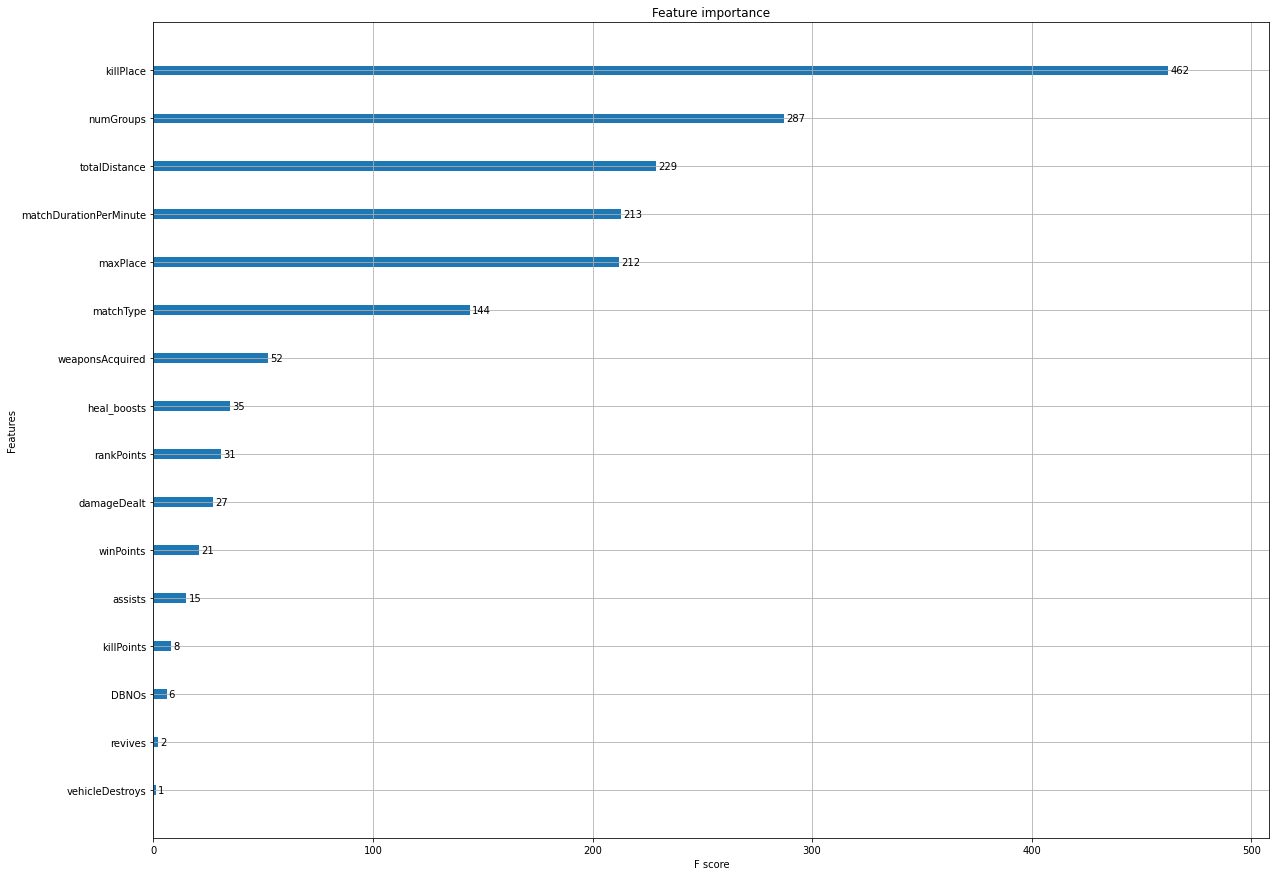

In [ ]:
fig , ax = plt.subplots(figsize=(20,15))
plot_importance(model, ax = ax)
plt.show()

In [ ]:

"""
WITHOUT BOLD MOVES
Human level	Training set	Dev set	Test set
R2	0.000000	0.918895	0.919830	0.919358
MAE	0.267912	0.062972	0.062622	0.062805
"""

"""
WITH ALL BOLD MOVES
Human level	Training set	Dev set	Test set
R2	0.000000	0.921428	0.917143	0.914262
MAE	0.245535	0.058134	0.058744	0.059976
"""
"""
Human level	Training set	Dev set	Test set
R2	0.000000	0.945413	0.940841	0.942140
MAE	0.233378	0.046037	0.046525	0.046879
"""

'\nHuman level\tTraining set\tDev set\tTest set\nR2\t0.000000\t0.945413\t0.940841\t0.942140\nMAE\t0.233378\t0.046037\t0.046525\t0.046879\n'

## Submitting to Kaggle

In [ ]:
X = df.drop(columns='winPlacePerc')
y = df['winPlacePerc']

# Split the data into training & remainder 
X_train, X_rem, y_train, y_rem = train_test_split(X,y, test_size=0.05)

# Split the remainer into validation & testing 
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem , test_size=0.5)

In [ ]:
model = XGBRegressor(learning_rate=0.8, n_estimators=200, random_state=42, verbosity=0, objective='reg:squarederror')
model.fit(X_train, y_train)
accuracies(model)

,Human level,Training set,Dev set,Test set
R2,0.000000,0.918895,0.919830,0.919358
MAE,0.267912,0.062972,0.062622,0.062805


In [ ]:
test = pd.read_csv("/content/gdrive/MyDrive/SHAI/DS Internship/PUBG Project/Data/test_V2.csv")

test.shape

(1934174, 28)

In [ ]:
test = wrangle(test)

test.shape

(1934174, 35)

In [ ]:
y_pred_final = model.predict(test)

In [ ]:
#sample = pd.read_csv("/content/gdrive/MyDrive/SHAI/DS Internship/PUBG Project/Data/sample_submission_V2.csv")

In [ ]:
#pd.read_csv("/content/gdrive/MyDrive/SHAI/DS Internship/PUBG Project/Data/sample_submission_V2.csv")

In [ ]:
pd.read_csv("/content/gdrive/MyDrive/SHAI/DS Internship/PUBG Project/Data/test_V2.csv").head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.0,0,0,2963.0,4,0


In [ ]:
type(y_pred_final)

numpy.ndarray

In [ ]:
pd.DataFrame(pd.Series(y_pred_final), columns=['winPlacePerc']).to_csv('sub_1.csv', index=False)

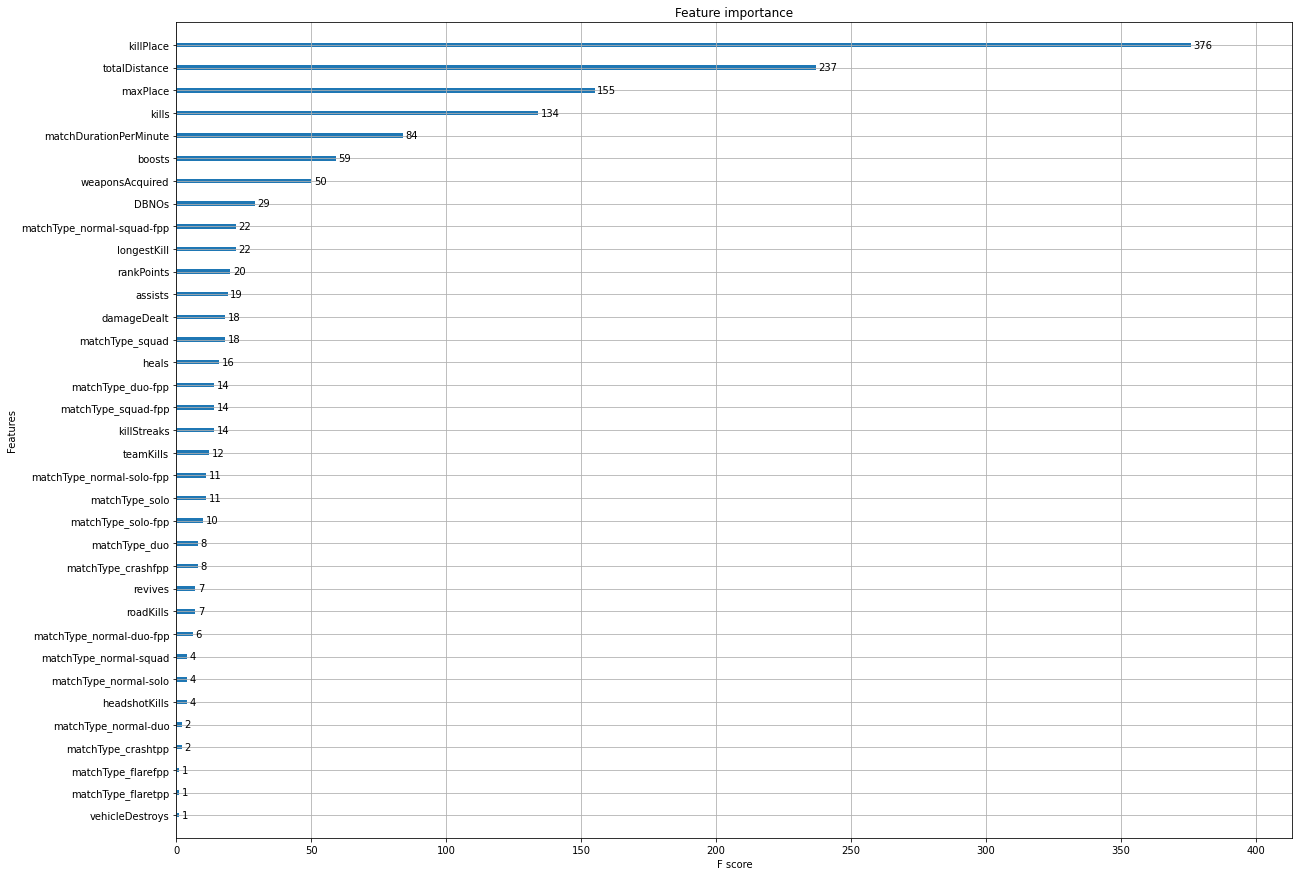

In [ ]:
fig , ax = plt.subplots(figsize=(20,15))
plot_importance(model, ax = ax)
plt.show()